In [3]:
import relative_strength

In [4]:
a,b = relative_strength.sector_strength()

<Axes: xlabel='Date'>

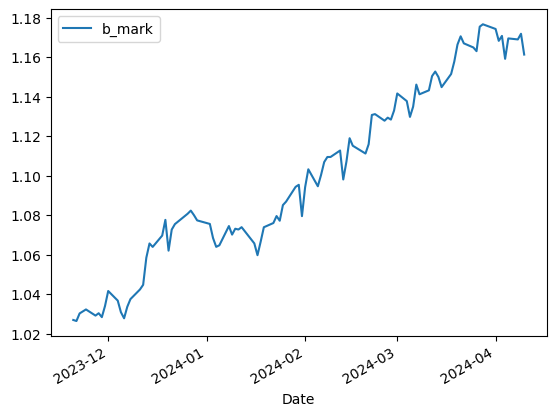

In [6]:
a.plot()